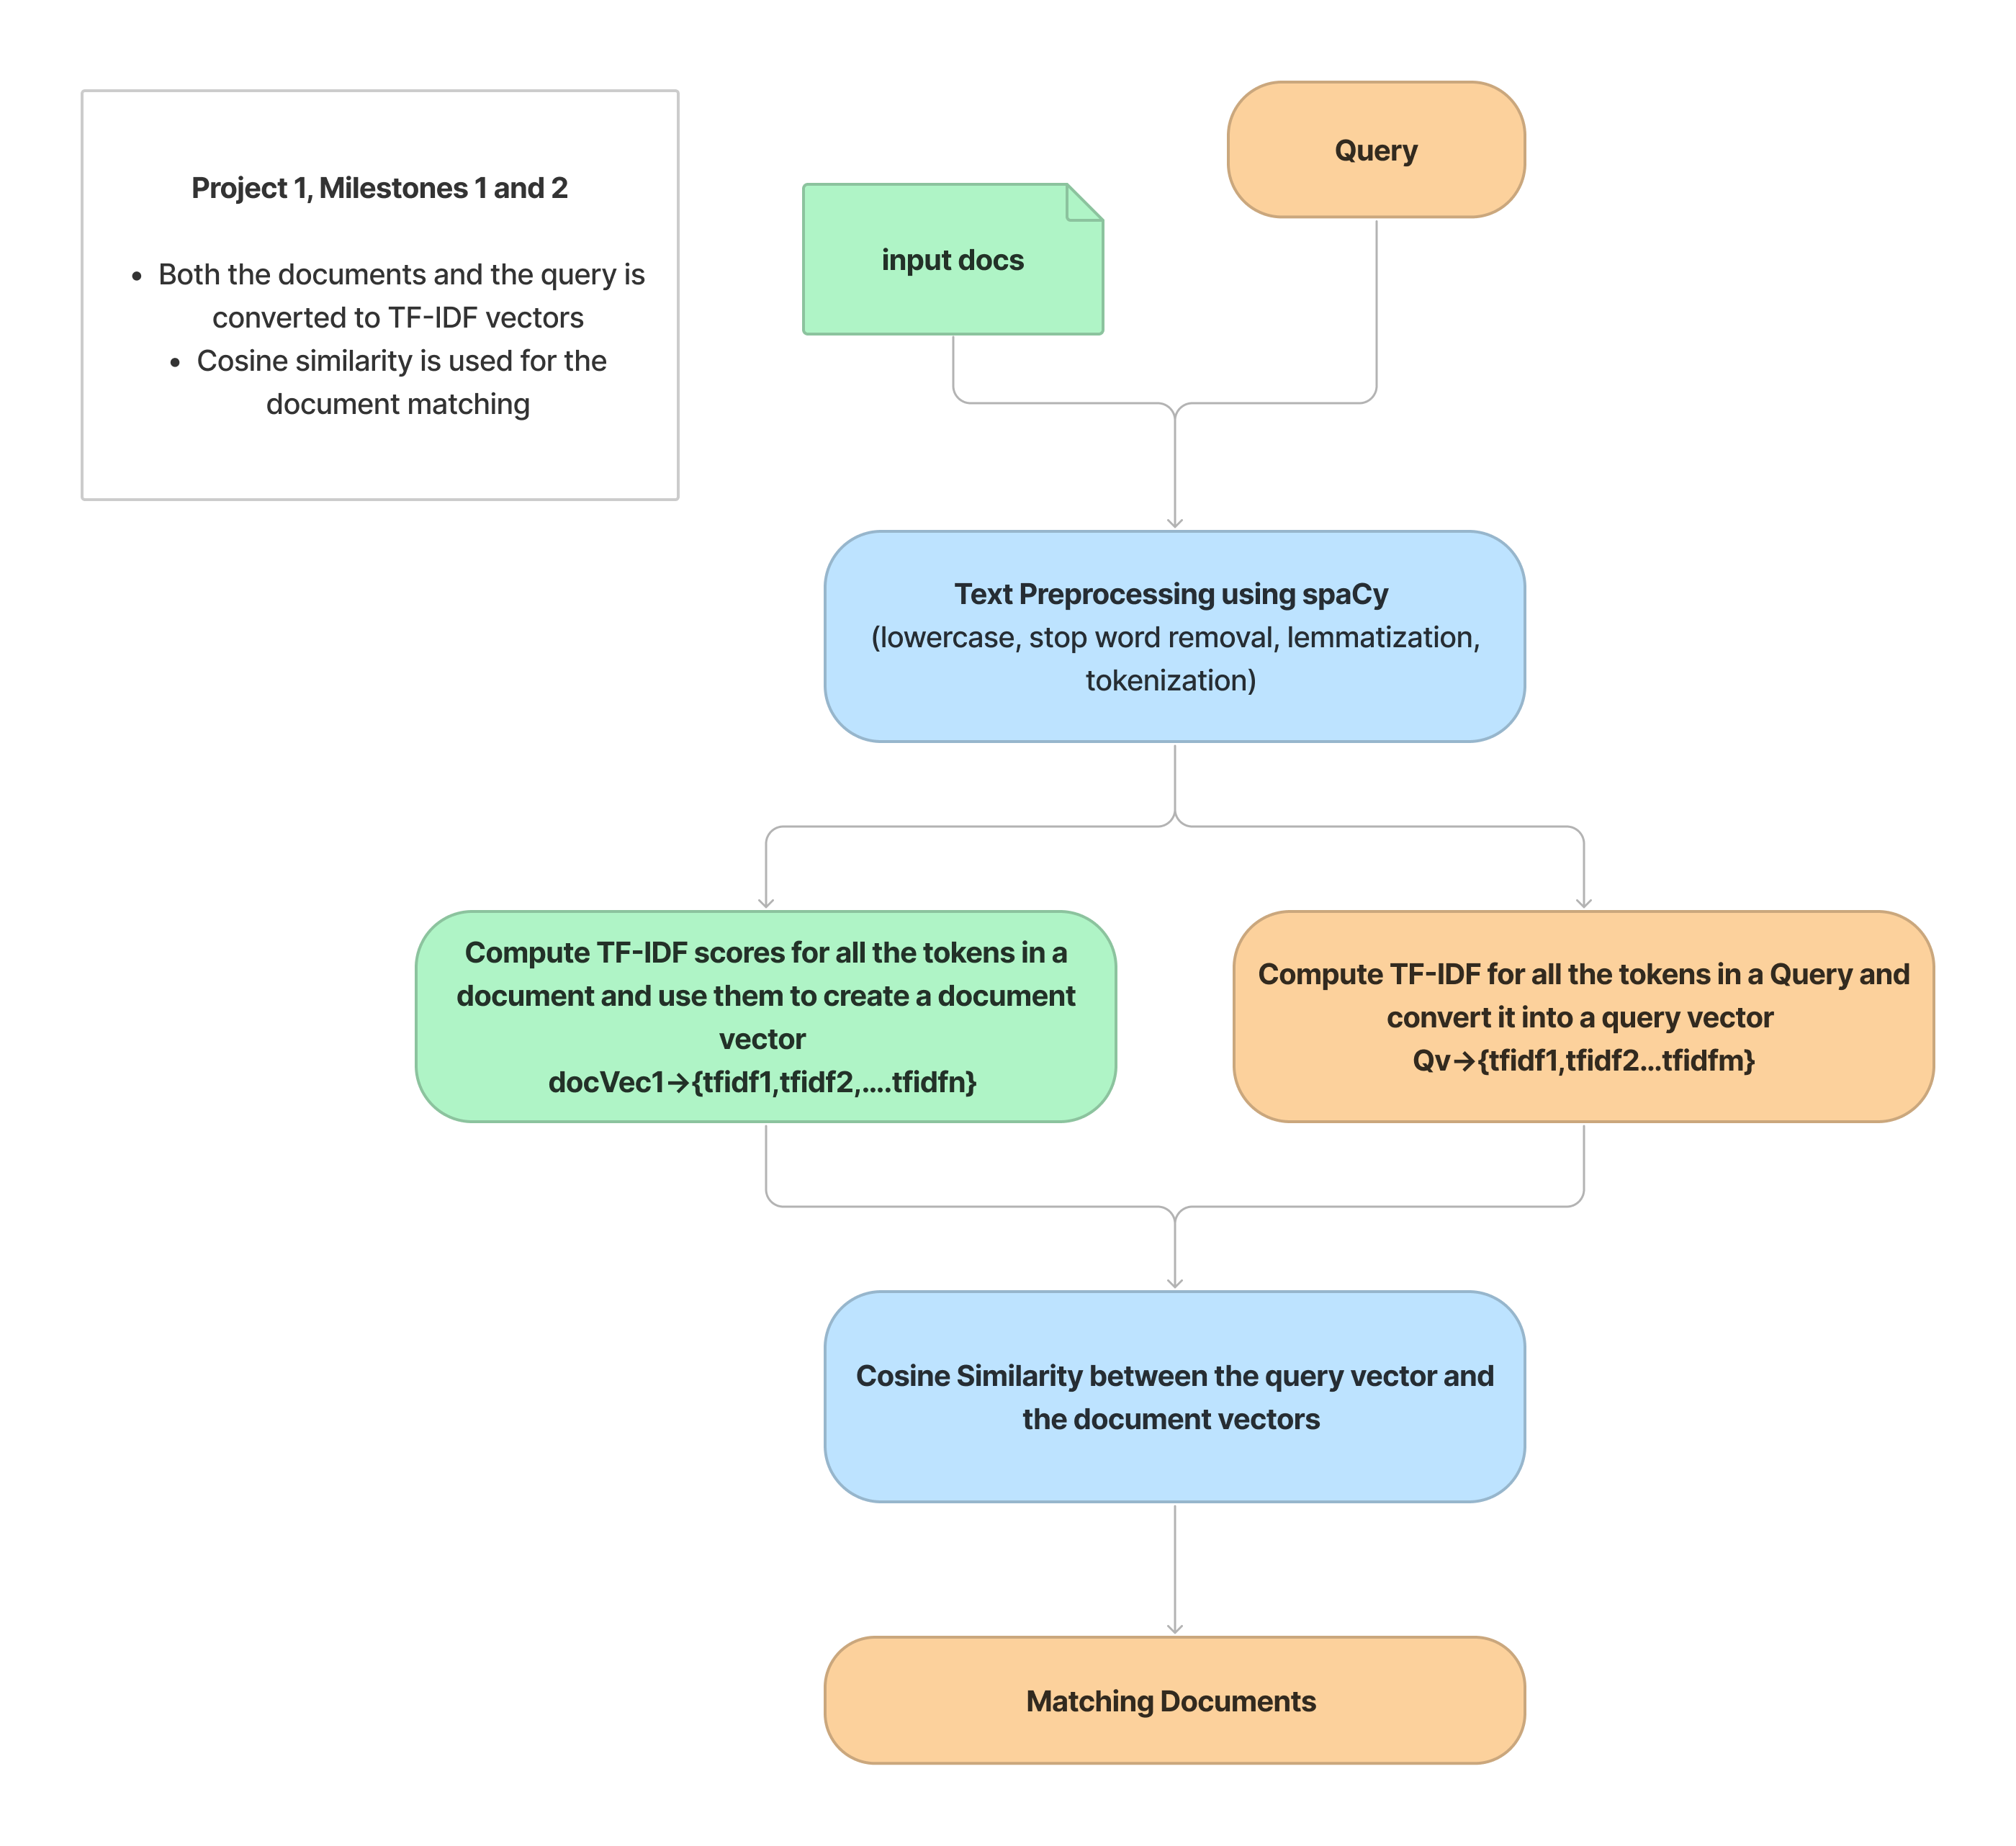

# Workflow

1. Load all relevant Python libraries and a spaCy language model.

2. Open the provided JSON file. It contains a list of dictionaries with summaries from Wikipedia articles, where each dictionary has three key-value pairs. The keys `title`, `text` and `url` correspond to:
 - Title of the Wikipedia article the text is taken from.
 - Wikipedia article text. (In this dataset we included only the summary.)
 - Link to the Wikipedia article.

3. Create a Python function that takes in a text string, performs all operations described in the previous step, and outputs a list of tokens (lemmas).
 - Lowercases the text string.
 - Creates a spaCy document with the text lemmas and their attributes using a spaCy model of your choice.
 - Removes stopwords, punctuation, and other unclassified lemmas.
 - Returns a list of tokens (lemmas) found in the text.

4. Use this function to preprocess all text documents in the dataset (`text` field only), and add the resulting lists to the dictionaries from step 1. You should end up with a list of dictionaries, each of which now has four key-value pairs:
 - `title`: Title of the Wikipedia article the text is taken from.
 - `text`: Wikipedia article text. (In this dataset we included only the summary.)
 - `tokenized_text`: Tokenized Wikipedia article text.
 - `url`: Link to the Wikipedia article.

5. Save the new list of dictionaries in JSON format.


In [1]:
# Step 01. Load all relevant Python libraries and a spaCy language model
import json
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
fp = open('../data.json')
articles = json.load(fp)

In [2]:
def process_text(input_text):
    # Lowercase the input text
    input_text = input_text.lower()
    
    # Create a spaCy document
    doc = nlp(input_text)
    
    # List to hold tokens
    tokens = []
    
    # Iterate through each token in the doc
    for token in doc:
        # Only add the token to the list if it's not a stopword or punctuation
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens.append(token.lemma_)
            
    # Return the list of tokens
    return tokens

In [3]:
# A function to process all documents in a dataset
def process_documents(dataset):
    for document in dataset:
        # preprocess the text in the document
        tokens = process_text(document['text'])
        # add the tokens to the document object
        document['tokenized_text'] = tokens
    return dataset


In [5]:
processed_dataset = process_documents(articles)

# Save the processed dataset as a JSON file
with open('processed_dataset.json', 'w') as file:
    json.dump(processed_dataset, file, ensure_ascii=False, indent=4)